In [22]:
# Data https://www.kaggle.com/datasets/shenba/time-series-datasets?select=Electric_Production.csv

import pandas as pd

electric_data = pd.read_csv('Electric_Production.csv')
electric_data

# check if there is any missing data
print('The null value in the missing data are',electric_data.isnull().sum())

The null value in the missing data are DATE          0
IPG2211A2N    0
dtype: int64


In [23]:
#spit for the train and test data
train_data = electric_data.iloc[:len(electric_data)-24]
test_data = electric_data.iloc[len(electric_data)-24:]
print(train_data.shape, test_data.shape)

(373, 2) (24, 2)


In [24]:
train_data

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151
...,...,...
368,9/1/2015,101.9204
369,10/1/2015,91.5959
370,11/1/2015,93.0628
371,12/1/2015,103.2203


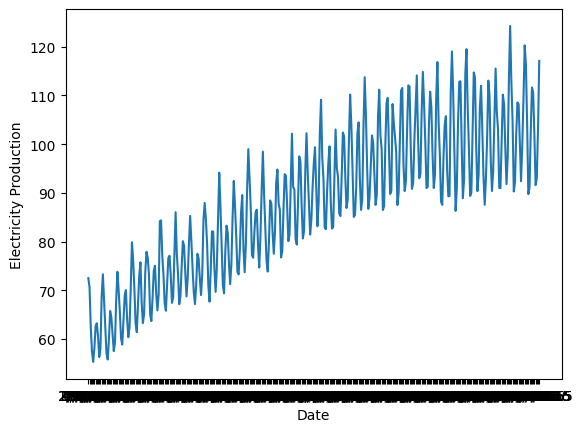

In [25]:
import matplotlib.pyplot as plt
plt.plot(train_data['DATE'], train_data['IPG2211A2N'])
plt.xlabel('Date')
plt.ylabel('Electricity Production')
plt.show()


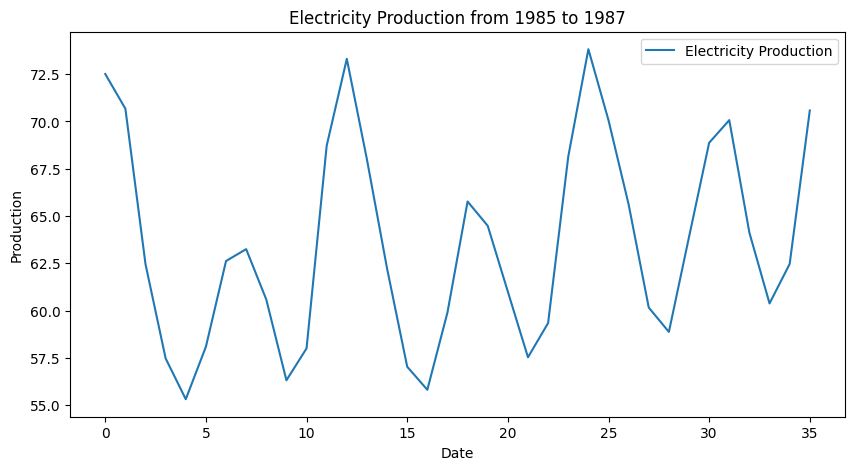

In [26]:
# see the data from first three years for the pattern
import matplotlib.pyplot as plt

data_first_three_years = train_data[:36]

# Plot the data for the first three years
plt.figure(figsize=(10, 5))  # Set the figure size as desired
plt.plot(data_first_three_years.index, data_first_three_years['IPG2211A2N'], label='Electricity Production')
plt.title('Electricity Production from 1985 to 1987')
plt.xlabel('Date')
plt.ylabel('Production')
plt.legend()
plt.show()

There is a significant seasonal tread by plot the first three years of the data.

In [27]:
## Stationarity Test using ADF Test

from statsmodels.tsa.stattools import adfuller


# Make sure the 'DATE' column is in datetime format
train_data_ts= train_data.copy()
train_data_ts['DATE'] = pd.to_datetime(train_data_ts['DATE'])


# Set the 'DATE' column as the index
train_data_ts.set_index('DATE', inplace=True)

# Apply the ADF test on the time series
result = adfuller(train_data_ts['IPG2211A2N'])

# Output the results
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.437851
p-value: 0.131337
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


In [32]:
train_data_ts['IPG2211A2N']

DATE
1985-01-01     72.5052
1985-02-01     70.6720
1985-03-01     62.4502
1985-04-01     57.4714
1985-05-01     55.3151
                ...   
2015-09-01    101.9204
2015-10-01     91.5959
2015-11-01     93.0628
2015-12-01    103.2203
2016-01-01    117.0837
Name: IPG2211A2N, Length: 373, dtype: float64

In [37]:
# take the log transformation to constance the vrariance
import numpy as np

train_data_ts['IPG2211A2N_log'] = np.log(train_data_ts['IPG2211A2N'])

In [40]:
train_data_ts_diff = train_data_ts['IPG2211A2N'].diff(12)
train_data_ts_diff.isnull().sum()
# print the null values location
train_data_ts_diff[train_data_ts_diff.isnull()]
#drop the null values, need more explaination for how to handle the null values
train_data_ts_diff.dropna(inplace=True)

In [41]:
# perform adf test for this one the differenced data, log transformation before differencing I (for non_constance variance)

result_diff = adfuller(train_data_ts_diff)

# Output the results
print('ADF Statistic: %f' % result_diff[0])
print('p-value: %f' % result_diff[1])
print('Critical Values:')
for key, value in result_diff[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -5.543496
p-value: 0.000002
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


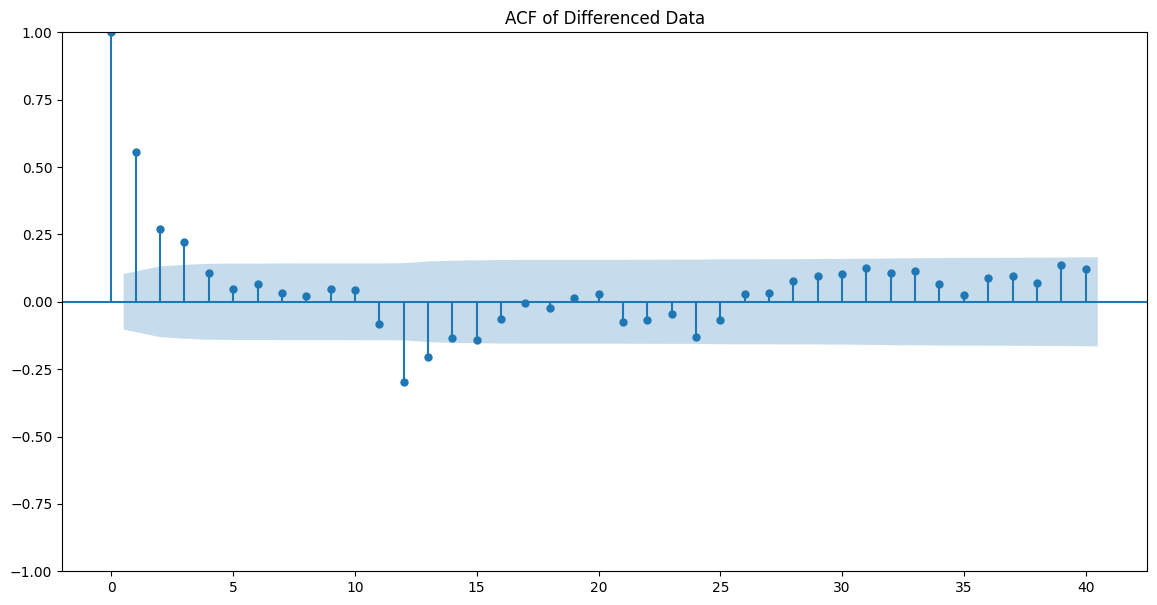

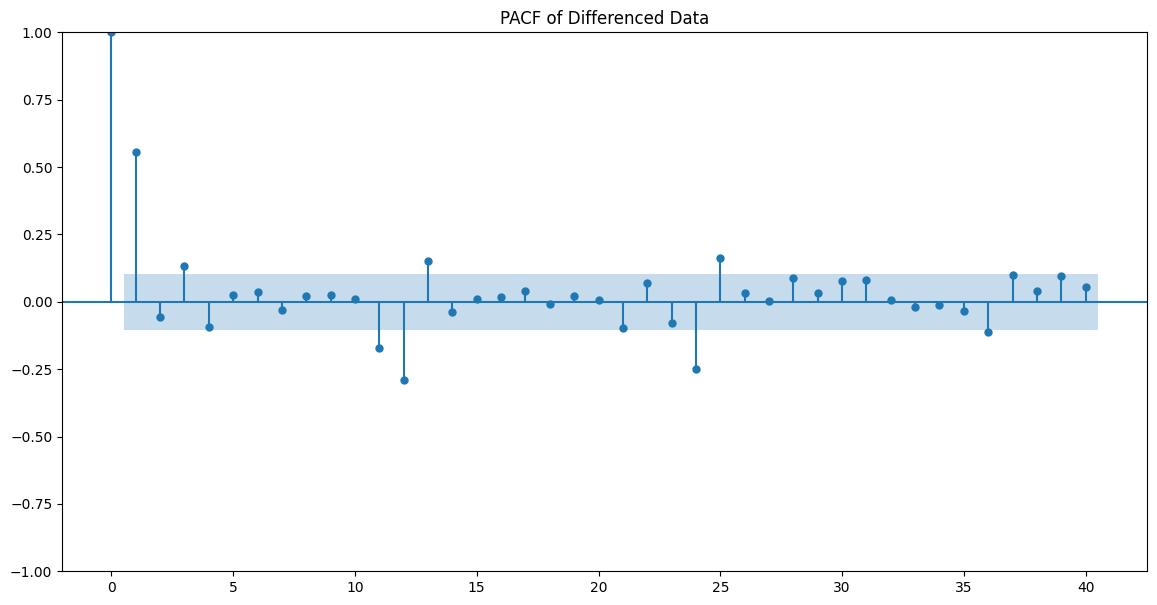

In [43]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt



# Plot the ACF
plt.figure(figsize=(14,7))
plot_acf(train_data_ts_diff, ax=plt.gca(), lags=40)
plt.title('ACF of Differenced Data')
plt.show()

# Plot the PACF
plt.figure(figsize=(14,7))
plot_pacf(train_data_ts_diff, ax=plt.gca(), lags=40)
plt.title('PACF of Differenced Data')
plt.show()
# seasonal differencing to elimate the seaconal trend

In [44]:
## AIC value for some possible ARIMA models
from statsmodels.tsa.arima.model import ARIMA

models = [(1,1,0), (0,1,1), (1,1,1)]
for model_order in models:
    model = ARIMA(train_data_ts_diff, order=model_order)
    model_fit = model.fit()

    print(f'ARIMA{model_order} AIC: {model_fit.aic}')

ARIMA(1, 1, 0) AIC: 1814.518958165988
ARIMA(0, 1, 1) AIC: 1796.827775417234
ARIMA(1, 1, 1) AIC: 1743.578517448986


c:\Users\Gus Li\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Gus Li\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Gus Li\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Gus Li\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Gus Li\AppData\Local\Programs\Python\Python

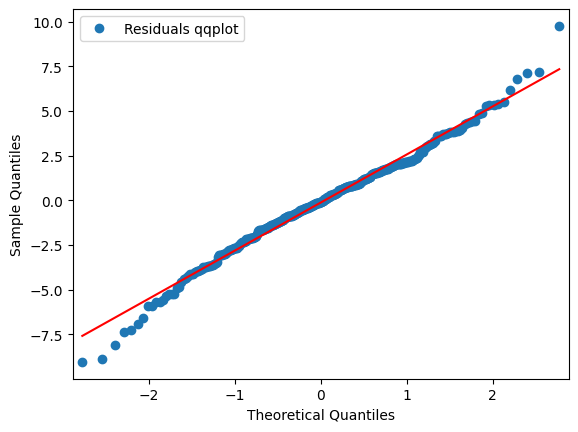

Residuals mean:  -0.12470132360890848


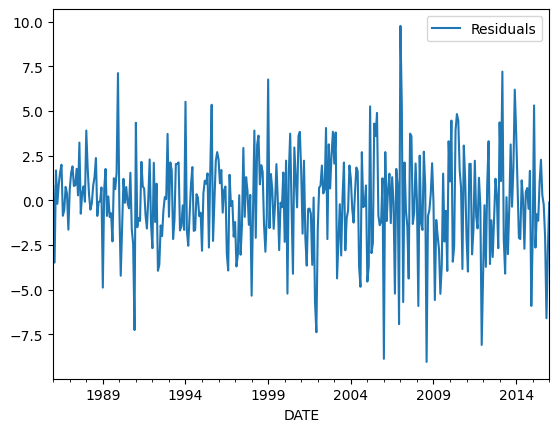

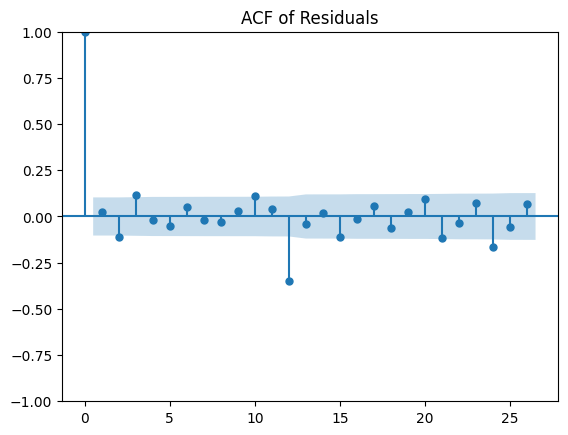

In [45]:
import statsmodels.api as sm

# ARIMA(1,1,1) is the best one base on AIC

# 1. Conduct Diagnostic Checks
residuals = model_fit.resid
fig = sm.qqplot(residuals, line='s')  # Q-Q plot
plt.legend(['Residuals qqplot'])
plt.show()

print('Residuals mean: ', residuals.mean())

# Plotting the residuals to see if there is any obvious seasonality or trend
residuals.plot()
plt.legend(['Residuals'])
plt.show()

# ACF plot of the residuals to check for autocorrelation
plot_acf(residuals)
plt.title('ACF of Residuals')
plt.show()




In [51]:
# Forecast the future values corresponding to the test set time period
test_data_ts = test_data.copy()
test_data_ts['DATE'] = pd.to_datetime(test_data_ts['DATE'])
test_data_ts.set_index('DATE', inplace=True)


forecast = model_fit.forecast(steps=len(test_data_ts))

# The forecast returns a tuple (predicted mean, std error, confidence interval)
forecast_values = forecast[0]

# Compare forecasted values to the actual values in the test set
# This assumes test_data and forecast_values are aligned by their index
comparison_df = pd.DataFrame({'actual': test_data['IPG2211A2N'], 'forecasted': forecast_values})

# Calculate some metric like MSE or MAE for the comparison
rmse = np.sqrt(((comparison_df['actual'] - comparison_df['forecasted']) ** 2).mean())
mae = (comparison_df['actual'] - comparison_df['forecasted']).abs().mean()
mape= (comparison_df['actual'] - comparison_df['forecasted']).abs().mean()/comparison_df['actual'].mean()

print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'Mean Absolute Percentage Error: {mape}')




Root Mean Squared Error: 104.84405361865107
Mean Absolute Error: 104.3233207422378
Mean Absolute Percentage Error: 1.0141475815519168


## Holt-Winter

The Mean Squared Error of the forecasts is 22.653144393199998


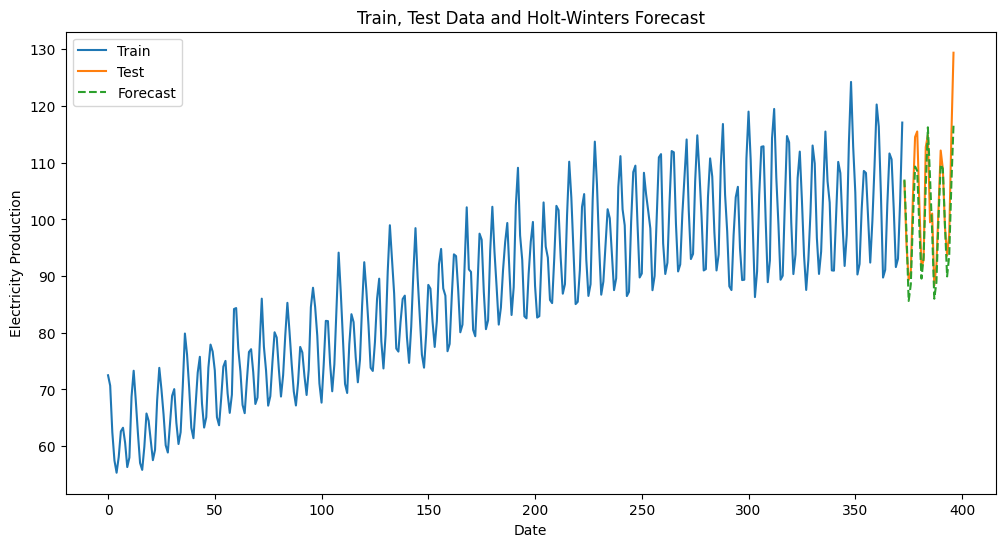

In [52]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit the model
# The parameters `trend` and `seasonal` should be chosen based on your data.
# Use 'add' if you see an additive trend or seasonality, 'mul' for multiplicative, and None if not applicable.
hw_model = ExponentialSmoothing(
    train_data['IPG2211A2N'],
    seasonal_periods=12,  # This should be set based on the seasonality of your data
    trend='add',
    seasonal='add',
    damped_trend=True,
    use_boxcox=True,  # You can set this to True or specify a lambda for Box-Cox transformation
    initialization_method="estimated"  # This can help with providing better initial values for the model
).fit(optimized=True)

# Forecast the future values corresponding to the test set time period
hw_forecast = hw_model.forecast(steps=len(test_data))

# Compare forecasted values to the actual values in the test set
# Create a DataFrame for plotting and comparison
forecast_df = pd.DataFrame({'Forecasted': hw_forecast}, index=test_data.index)

# Calculate mean squared error or any other accuracy measure
mse = np.mean((test_data['IPG2211A2N'] - forecast_df['Forecasted'])**2)
print(f'The Mean Squared Error of the forecasts is {mse}')

# Plot actual vs forecasted
plt.figure(figsize=(12, 6))
plt.plot(train_data['IPG2211A2N'], label='Train')
plt.plot(test_data['IPG2211A2N'], label='Test')
plt.plot(forecast_df['Forecasted'], label='Forecast', linestyle='--')
plt.title('Train, Test Data and Holt-Winters Forecast')
plt.xlabel('Date')
plt.ylabel('Electricity Production')
plt.legend()
plt.show()


